Vietnam FDI Total Reserves
ベトナムの外貨準備

world bankの以下のウェブサイトからダウンロードした csvファイルの最初の４行の不要部分を消去する。
https://data.worldbank.org/country/vietnam?view=chart


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/API_TUR_DS2_en_csv_v2_5457221.csv", on_bad_lines = 'warn', encoding ='utf-8')

In [5]:
country = df["Country Name"][0]

In [6]:
df.shape

(1478, 67)

In [7]:
df1 = df.drop(["Country Name", "Country Code", "Indicator Code"], axis = 1)

In [8]:
df1 = df1.set_index('Indicator Name')

In [9]:
df2 = df1.iloc[:, 40:]

In [10]:
df2.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,6.689673e+00,6.775106e+00,7.810938e+00,7.483252e+00,8.428052e+00,7.499622e+00,NaN,...,NaN,NaN,4.548119e+00,5.551665e+00,5.130638e+00,4.237111e+00,3.749975e+00,4.094069e+00,4.005664e+00,NaN
"Internally displaced persons, new displacement associated with conflict and violence (number of cases)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.040000e+05,NaN,NaN,2.000000e+03,NaN,NaN,NaN
"Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval",3.034826e+01,NaN,3.432836e+01,4.029851e+01,4.134615e+01,4.134615e+01,3.701923e+01,3.750000e+01,3.990385e+01,3.981042e+01,...,3.380282e+01,3.054187e+01,2.857143e+01,2.364532e+01,2.266010e+01,1.884058e+01,2.028986e+01,2.028986e+01,1.980676e+01,NaN
Travel services (% of commercial service exports),3.983515e+01,5.392255e+01,6.065961e+01,7.418275e+01,7.144234e+01,6.978038e+01,6.776260e+01,6.563524e+01,6.374823e+01,6.499604e+01,...,4.893407e+01,4.884099e+01,4.943086e+01,4.173964e+01,4.314293e+01,4.428393e+01,5.164782e+01,3.519379e+01,4.361439e+01,4.595741e+01
Commercial service exports (current US$),1.916900e+10,1.500300e+10,1.397800e+10,1.792600e+10,2.283100e+10,2.750200e+10,2.576200e+10,2.960300e+10,3.665200e+10,3.535600e+10,...,5.877500e+10,6.220800e+10,5.525900e+10,4.579100e+10,5.323700e+10,5.856300e+10,6.642100e+10,3.787600e+10,6.106700e+10,8.959600e+10


In [11]:
allindex=list(df2.index.tolist())
#allindex

In [12]:
indexlist = pd.DataFrame(allindex)
indexlist.to_csv('result/test.csv')

In [48]:
# make up a list of one word with capital letters. Please give the key_word to list up indicators with the word.
key_word = 'inflation'
capitalized = key_word.capitalize()
key_words_list = [key_word, capitalized]

In [49]:
possible_index = []
for i in indexlist[0]:
    for j in key_words_list:
        if j in i:
            possible_index.append(i)
        

In [50]:
possible_index

['Inflation, consumer prices (annual %)',
 'Inflation, GDP deflator (annual %)',
 'Inflation, GDP deflator: linked series (annual %)']

In [51]:
df3 = df2.loc[possible_index]
df4 = df3.dropna(thresh=11)

In [52]:
df4 = df4.astype(float)
#df4.iloc[0]

In [53]:
item_numbers = len(df4)

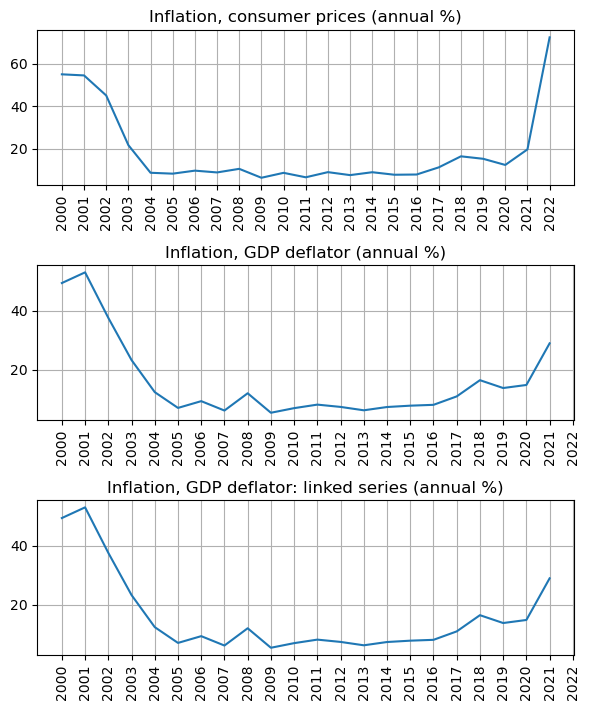

In [54]:
fig, ax = plt.subplots(item_numbers, figsize=(6, 2.5*item_numbers ))

for i in range(item_numbers):
    ax[i].plot(df4.iloc[i])
    ax[i].set_title (df4.index[i])
    ax[i].tick_params(axis='x', labelrotation=90)
    ax[i].grid()
fig.tight_layout(rect=[0,0,1,0.96])    
plt.savefig("result/" + country + ' ' + key_word +  ".jpg")
